In [ ]:
# libreria para procesos numericos.
import numpy as np
# expande a numpy
import scipy as sc
# creacion de graficos
import matplotlib.pyplot as plt
# cogemos una base de datos
from sklearn.datasets import make_circles

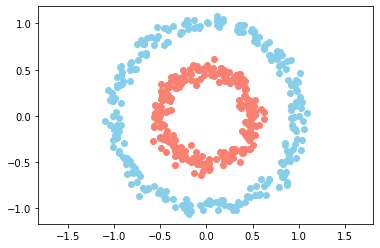

In [ ]:
# vamos a crear nuestro Dataset.
# variable n, es el numero de registros de nuestros datos.
# variable p, el numero de caracteristicas que tendrá cada registro.
n = 500
p = 2

# x entradas. y salidas.
# el factor es la distancia entre los circulos.
circle = make_circles(n_samples= n, factor= 0.5, noise= 0.05)
X, Y = circle
Y = Y[:, np.newaxis]

# creamos el circulo exterior.
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
# y los indices 1 del vector y, formaran el circulo interior.
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
# le decimos a la libreria matplotlib que nos visualice los ejes proporcionados.
plt.axis("equal")
plt.show()

In [ ]:
# CLASE DE LA CAPA DE LA RED
# cada capa de neuronas poseen la misma funcionalidad. es lógico pensar entonces, en tratarlas como
#módulos de programación. Así creamos una clase que configurará las neuronas de la capa.
class neural_layer():
   #parametros del constructor: numero de conexiones que recibe la neurona, numero de neuronas que
  # posee la capa. la función de activación de las neuronas.
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    # las bayas o umbrales de las neuronas. tantas como neuronas. se multiplica entre dos y se resta
    # uno para que tengamos un rango entre -1 y 1.
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    # creamos las omegas o pesos. tantas como neuronas tenga la capa anterior.
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

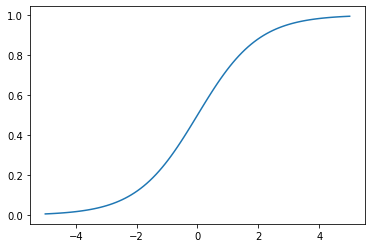

In [ ]:
# FUNCIONES DE ACTIVACION
# escala en un rango de 0 a 1. tambien creamos su derivada.
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x)) # derivada

relu = lambda x: np.maximum(0, x)

#pintamos la funcion graficamente a modo de ejemplo.
ejemplo = np.linspace(-5,5,100)
plt.plot(ejemplo,sigm[0](ejemplo))

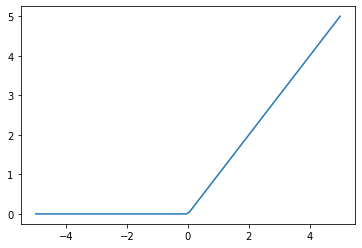

In [ ]:
# la funcion RELU
_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [ ]:
# CREAMOS LA RED NEURONAL
# creamos una funcion que genere la red de neuronas
def create_nn(topology, act_f):
#estructura de la red
  nn = []
  # descartamos el ultimo valor, [:-1], para que no ocurra un overflow..
  for l, layer in enumerate(topology[:-1]):
    #recordamos los atriburos del objeto de la clase neural_layer:
    # numero de conexiones que recibe la neurona, numero de neuronas que 
    # posee la capa. la función de activación de las neuronas.
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn

In [ ]:
# FUNCION DE ENTRENAMIENTO
# creamos una variable con la topologia de la red.
# p = numero de atributos de entrada de nuestra red.
# los siguientes numeros son el numero de neuronas de cada capa.
topology = [p, 4, 8, 1]

# creamos la red neuronal.
neural_net = create_nn(topology, sigm)  


# Vamos a definir la función de coste. Que será la función que nos
# determinará el grado de error. Yp: valor predicho. Yr: valor real.
# tambien incluimos su derivada para tenerlo todo. 
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


# le pasamos como parametros: la red neuronal creada, los datos de entrada: x, 
#los resultados esperados o de salida: y, la funcion de coste, el ratio de 
# aprendizaje,(learning ratio). boolean: train para entrenar, o false, para dar una prediccion.
def train(neural_net, X, Y, l2_cost, lr=0.05, train=True):
  
  out = [(None, X)]
  
   # forward pass: pasamos los inputs capa por capa, realizamos las sumatorias ponderadas: valor
  # de x por la omega + su baya, y finalmente, el resultado pasarlo por la funcion de activacion.
  # z es la sumatoria. @: multiplicacion en matriz. a = activacion. 
  for l, layer in enumerate(neural_net):
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
  
    out.append((z, a))
  # print("prediccion: ",l2_cost[0](out[-1][1],Y))
  
  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      # print("valores por capas: ",a.shape)
      # calcular delta de ultima capa
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
        
       # calcular las deltas de capas con capas posteriores.
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
       
      #variable auxiliar para guardar la omega.
      _W = neural_net[l].W
      # descenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
        
  return out[-1][1]
  
train(neural_net, X, Y, l2_cost, 0.5)  
print("")

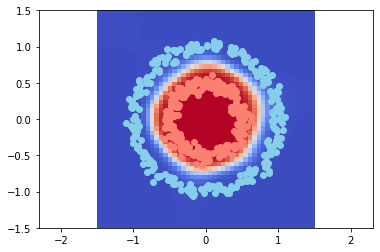

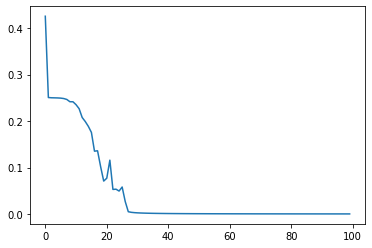

In [ ]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output
# creamos otra red neuronal
neural_n = create_nn(topology, sigm)
# guardamos los costes. asi vemos la evolucion del error en el tiempo.
loss = []

for i in range(2500):
    
  # Entrenamos nuestra primera red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  #... y cada 25 iteraciones...
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
    
    #...generaremos una malla de 50 x 50...
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        #...realizando una prediccion, por eso train está en False.
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
    
    # borramos y pintamos para que se vea de forma animada. 
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  